# Métodos Numéricos (2024)

## Guía 6: Integración Numérica

In [2]:
using Plots
using LaTeXStrings

## Problema 1
1. Haciendo los calculos a mano y trabajando con 7 cifras significativas, encuentre las aproximaciones a las integrales definidas:

    a. $I_1 = \int_0^1 x^4 dx$

    b. $I_2 = \int_0^{\pi} \sin{(x)} dx$

utilizando las reglas simples de *i) punto medio*, *ii) trapecio* y *iii) Simpson*. 

2. Calcule el error absoluto y el error relativo en cada caso y para cada método.

**Teoría**

La regla simple del punto medio es:
$$
\int_a^b dx\, f(x) \approx (b-a)f\bigg(\frac{a+b}{2}\bigg)
$$

La regla simple del trapecio es:
$$
\int_a^b dx\, f(x) \approx \frac{b-a}{2}\bigg(f(a) + f(b)\bigg)
$$

La regla simple de Simpson es:
$$
\int_a^b dx\, f(x) \approx \frac{b-a}{6}\bigg(f(a) + 4f\bigg(\frac{a+b}{2}\bigg) + f(b)\bigg)
$$

In [3]:
#=integralpm(a,b,f) = (b-a)*f((a+b)/2)
integraltr(a,b,f) = ((b-a)/2)*(f(a)+f(b))
integralsi(a,b,f)=((b-a)/6)*(f(a)+4f((a+b)/2)+f(b))
    
I1= [integralpm(0,1,x->x^4) integraltr(0,1,x->x^4) integralsi(0,1,x->x^4)]
eI1= abs.(I1.-1/5)
I2=[integralpm(0,pi,x->sin(x)) integraltr(0,pi,x->sin(x)) integralsi(0,pi,x->sin(x))]
eI2=abs.(I2.-2)

println(eI1)
println(eI2)=#

## Problema 2

1. Repita el problema 1 dividiendo el intervalo de integración en dos subintervalos de igual tamaño. Es decir:

    a. $I_1=\int_0^{1/2} x^4 dx+ \int_{1/2}^1 x^4 dx$

    b. $I_2=\int_0^{\pi/2}\sin{(x)}dx+\int_{\pi/2}^{\pi}\sin{(x)} dx$

2. Compare resultados con lo obtenido en el problema 1.

In [4]:
#=I11 =[integralpm(0,1/2,x->x^4)+integralpm(1/2,1,x->x^4) integraltr(0,1/2,x->x^4)+integraltr(1/2,1,x->x^4) integralsi(0,1/2,x->x^4)+integralsi(1/2,1,x->x^4)]
I22=[integralpm(0,pi/2,x->sin(x))+integralpm(pi/2,pi,x->sin(x)) integraltr(0,pi/2,x->sin(x))+integraltr(pi/2,pi,x->sin(x)) integralsi(0,pi/2,x->sin(x))+integralsi(pi/2,pi,x->sin(x))]
Mucho mejor que el anterior =#

## Problema 3
1. Construya funciones que dada una función arbitraria, retornen  las aproximaciones numéricas $S_M$, $S_T$ y $S_S$ a una integral de la forma
$$
I = \int_a ^b f(x) dx
$$
utilizando las reglas compuestas del *punto medio*, del *trapecio* y de *Simpson*, respectivamente.
Las funciones deben evaluar el integrando $f(x)$ en $n+1$ puntos equiespaciados $x_i$ para $i=0,1,2,...,n$ y con espaciamiento $h=(b-a)/n$.
En el caso del punto medio, se evalúa en los $x_i+h/2$ para $i=0,1,...,n-1$.

2. Calcule $S_M$, $S_T$ y $S_S$ para la integral:
$$
I = \int _0 ^1 e^{-x} dx
$$
Utilice un espaciamiento $h_1=0.05$ em ambos casos. Luego repita el procedimiento disminuyendo su 
espaciamiento a la mitad, $h_2=h_1/2=0.025$.

3. Teniendo en cuenta que es posible conocer el resultado exacto de la integral en cuestión, evalúe el error
$\varepsilon(h)=|S-I|$, para $h=0.05$ y $h=0.025$ para los tres métodos de aproximación.
Verifique que el cociente de precisión, definido como 
$$
Q = \frac{\varepsilon(h)}{\varepsilon(h/2)}
$$
toma un valor aproximado a $4$ cuando se usa la regla del *punto medio* y del *trapecio*, y un valor aproximado a $16$ cuando se usa la regla de *Simpson*. 
Teniendo en cuenta la expresión del error de truncamiento en cada caso, justifique este resultado.

**Consejo:** tener cuidado con *Simpson* en elegir siempre un número par de intervalos, i.e, un número impar de puntos. Pruebe con una integral conocida, qué resultados da cuando usa un número impar de intervalos. Incluya en la función para dicho método un chequeo de que el número de puntos sea par.

In [5]:
"""
    integralsi(a,b,f,n)

Calcula la aproximación de la integral definida de `a` hasta `b` de la función `f` con `n` intervalos usando el método de `Simpson compuesto`

"""
function integralsi(a,b,f::Function,n=100)
    @assert (n%2==0) "n debe ser par"  
    h = (b-a)/n
    imp,pa=0,0
    
    fp=f(a)+f(b) 
    
    for i in 1:(n/2)-1
        pa+=f(a+(2*i-1)*h)  
        imp+=f(a+(2*i)*h)
    end
    pa+=f(a+(n-1)*h);pa*=4
    imp*=2
    fp+=imp+pa
    return (h/3)*fp
end

integralsi

In [6]:
"""
    integraltr(a,b,f::Function,n::Int)

Calcula la aproximación de la integral definida de `a` hasta `b` de la función `f` con `n` puntos usando el método de `Trapecio compuesto`

"""
function integraltr(a,b,f::Function,n=100)
    h=(b-a)/n
    fp=0
    for i in 0:n-1
        fp+=f(a + h*i)
    end
    
    return (h/2)*(f(a)+2*fp+f(b))
    
end 

integraltr

In [8]:
"""
    integralpm(a,b,f,n)

Calcula la aproximación de la integral definida de `a` hasta `b` de la función `f` con `n` puntos usando el método de `Punto medio compuesto`

"""
function integralpm(a,b,f::Function,n=100)
    @assert (n%2==0) "n debe ser par"
    h=(b-a)/(n+2)
    fp=0
    for i in 0:n/2
        fp+=f(a + (2*i+1)*h)
    end
    
    return 2*h*fp
end

integralpm

In [9]:
npm(a,b,h)= -2 + (b-a)/h 
ntr(a,b,h) =  (b-a)/h
nsi(a,b,h) = (b-a)/h

nsi (generic function with 1 method)

In [10]:
a,b,f = 0,1,x->exp(-x)
h1 = 0.05

result = [integralpm(a,b,f,npm(a,b,h1)) integraltr(a,b,f,ntr(a,b,h1)) integralsi(a,b,f,nsi(a,b,h1));integralpm(a,b,f,npm(a,b,h1/2)) integraltr(a,b,f,ntr(a,b,h1/2)) integralsi(a,b,f,nsi(a,b,h1/2))]
err = abs.(result.-(-(1/exp(1)) +1))

Q=[err[1,1]/err[2,1] err[1,2]/err[2,2] err[1,3]/err[2,3]]

1×3 Matrix{Float64}:
 3.99913  2.00263  15.9964

## Problema 4
1. Para los métodos de integración numérica del problema 3, implemente fórmulas de estimación del error en función de el número de puntos $n$, una cota máxima $M$ asociada a $f(x)$ o alguna de sus derivadas, y los extremos $a$ y $b$ del intérvalo de integración.

2. Indique, para cada método, el mínimo $n$ necesario para alcanzar un error relativo menor a $10^{-7}$ de las siguientes integrales

    a. $\int_0^{1/2} \frac{2}{x-4} \; dx$

    b. $\int_1^{3/2} x^2 \log x \; dx$

3. Compruebe usando los métodos del problema 3 si las estimaciones de $n$ son adecuadas.

In [11]:
function der_num3p(t,x)

    
    n = length(t)
    result = Vector{Float64}(undef,n)

        result[1] = (-3*x[1]+4*x[2]-x[3])/(t[3]-t[1]) #En los extremos utilizamos la derivada hacia delante de 3 puntos
    
        for i in 2:n-1
            result[i] = (x[i+1]-x[i-1])/(t[i+1]-t[i-1]) #Centrada de 3 puntos
        end
    
        result[n] = (-3*x[n]+4*x[n-1]-x[n-2])/(t[n-2]-t[n]) #En los extremos utilizamos la derivada hacia atrás de 3 puntos
        

    return result
end


der_num3p (generic function with 1 method)

In [12]:
"""
    est_errSI(a,b,f,n)

Calcula una cota para el error numérico de la integral definida con el `método de Simpson compuesto` de `a` hasta `b` de la función `f` con `n` puntos 

"""
function est_errSI(a,b,f,n)
     @assert n!=0
    x = a:0.01:b
    f4= der_num3p(x,f.(x))|>j->der_num3p(x,j)|>j->der_num3p(x,j)|>j->der_num3p(x,j) #Cálculo numérico de la f4
    return maximum(abs.(f4.*(  ((b-a)^5)/(18*(n^4))   )  )  )
end

est_errSI

In [13]:
"""
    est_errTR(a,b,f,n)

Calcula una cota para el error numérico de la integral definida con el `método de trapecio compuesto` de `a` hasta `b` de la función `f` con `n` puntos 

"""
function est_errTR(a,b,f,n)
     @assert n!=0
    x = a:0.01:b
    f4= der_num3p(x,f.(x))|>j->der_num3p(x,j) #Cálculo numérico de la f2
    return maximum(abs.(f4.*(    ((b-a)^3)/(12*(n^2))    )  )  )
end

est_errTR

In [14]:
"""
    est_errPM(a,b,f,n)

Calcula una cota para el error numérico de la integral definida con el `método de punto medio compuesto` de `a` hasta `b` de la función `f` con `n` puntos 

"""
function est_errPM(a,b,f,n)
    @assert n!=0
    x = a:0.01:b
    f4= der_num3p(x,f.(x))|>j->der_num3p(x,j) #Cálculo numérico de la f2
    return maximum(abs.(f4.*(  ((b-a)^3)/(6*(n^2))  )  )  )
end
#est_errPM(0,1/2,x->x^4,1)

est_errPM

In [15]:
est_errPM(0,1/2,x->x^4,2)

0.015158854166667068

In [16]:
"""
    estim_n(a,b,f,tol,met)

Devuelve la cantidad de puntos para calcular la integral indefinida de `a` hasta `b` de la función `f` con un error menor a `tol`
# Argumentos
- `met`: "SI" para el método de `Simpson`
- `met`: "TR" para el método de `Trapecio`
- `met`: "PM" para el método de `Punto Medio`

"""
function estim_n(a,b,f,tol,met="SI")
    E,i=tol+1,2
    if met=="SI"
        while E > tol
            i+=1
            E=est_errSI(a,b,f,i)
        end
    elseif met=="PM"
        while E > tol
            i+=1
            E=est_errPM(a,b,f,i)
        end
    elseif met=="TR" 
        while E > tol
            i+=1
            E=est_errTR(a,b,f,i)
        end
    end        
    return i+i%2
end

estim_n

In [17]:
[estim_n(0,1/2,x->2/(x-4),10e-7,"PM") estim_n(0,1/2,x->2/(x-4),10e-7,"TR") estim_n(0,1/2,x->2/(x-4),10e-7,"SI")]

1×3 Matrix{Int64}:
 44  32  8

In [18]:
[estim_n(1,3/2,x->(x^2)*log(x),10e-7,"PM") estim_n(1,3/2,x->(x^2)*log(x),10e-7,"TR") estim_n(1,3/2,x->(x^2)*log(x),10e-7,"SI")]

1×3 Matrix{Int64}:
 282  200  18

## Problema 5
**Comparación de métodos.**

1. Aproxime la integral
\begin{equation*}
I = \int_0^1 e^{-t} dt = 1 - e^{-1}  \nonumber              
\end{equation*}
empleando los algoritmos del problema 3.

2. Calcule el error relativo $E$ para $n\in [2,4,8,...,4096]$ ($n=2^i$ con $i=1,2,...$) y grafique $E$ vs $n$ en *log-log*.


3. Verifique visualmente que se satisfacen leyes de potencia
$$
E = Cn^{-\alpha}
$$
y estime visualmente los valores de $C>0$ y $\alpha>0$.

4. Use el gráfico para estimar, para cada método, el mínimo $n$ al cuál se alcanza una precisión $E<10^{-7}$.

5. Repita los incisos anteriores en `Float16` y `Float32`.

6. Determine si el error de redondeo es relevante en estos casos.

In [19]:
k(x) = exp(-x)
#Aproximación con error menor a 10^-7
apr=[integralpm(0,1,k,estim_n(0,1,k,10e-7,"PM")) integraltr(0,1,k,estim_n(0,1,k,10e-7,"TR")) integralsi(0,1,k,estim_n(0,1,k,10e-7,"SI"))]

1×3 Matrix{Float64}:
 0.63212  0.635593  0.632121

In [20]:
I=1-exp(-1)
errorsi=abs.(([integralsi(0,1,k,i) for i in 2:4:4096].-I)./I)
errorpm=abs.(([integralpm(0,1,k,i) for i in 2:4:4096].-I)./I)
errortr=abs.(([integraltr(0,1,k,i) for i in 2:4:4096].-I)./I);

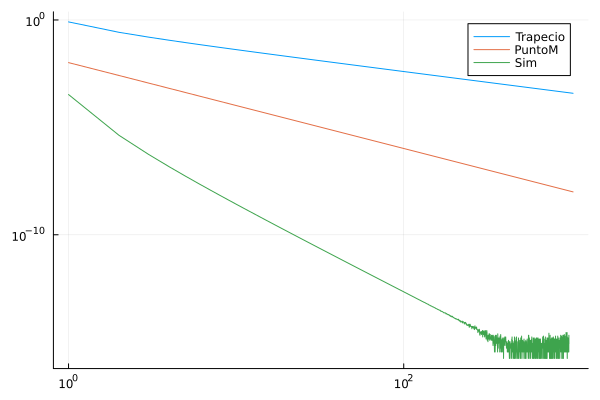

In [21]:
plot(errortr,xscale=:log10,yscale=:log10,label="Trapecio")
plot!(errorpm,label="PuntoM")
plot!(filter(!iszero,errorsi),label="Sim")

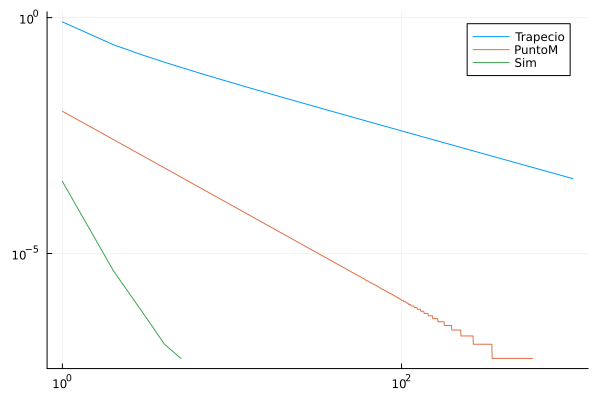

In [22]:
plot(filter!(!iszero,Float16.(errortr)),xscale=:log10,yscale=:log10,label="Trapecio")
plot!(filter!(!iszero,Float16.(errorpm)),label="PuntoM")
plot!(filter!(!iszero,Float16.(errorsi)),label="Sim")

Explotan los gráficos si no los flitro....


## Problema 6
En el repositorio se encuentran dos archivos de datos,

    mediciones1-c1-g6.dat 
    mediciones2-c1-g6.dat

Los mismos almacenan mediciones de una función $f(t)$ sobre un mismo rango de $t$. El primero muestrea $n=629$ puntos y el segundo $n=10001$.

1. Baje y grafique los datos.

2. Copie y modifique los algoritmos del problema 3 para integrar muestreos de funciones.

3. Integre los muestreos y compare.

In [34]:
"""
    integraltr(x::Vector,f::Vector)

En caso de pasar un número discreto de valores `x` y `f(x)`.
"""
function integraltr(x::Vector,f::Vector)
    n=length(f)
    I=0
    for i in 3:2:n
        #fp=0
        h1 = (x[i-1]-x[i-2])
        h2 = (x[i]-x[i-1])
        f1 = f[i-2]+f[i-1]
        f2 = f[i-1]+f[i]
        I += (h1/2)*(f1) + (h2/2)*(f2)
        #println("h = $h         I[$i] = $I")
    end
    
    return I

end

integraltr

In [35]:
"""
    integralpm(x::Vector,f::Vector)

En caso de pasar un número discreto de valores x y f(x).
"""
function integralpm(x::Vector,f::Vector)
    n=length(f)
    I=0
    for i in 2:2:n-1-n%2
        I += f[i+1]*(x[i+2]-x[i])
    end
    return I
end

integralpm

In [54]:
"""
    integralsi(x::Vector,f::Vector)

En caso de pasar un número discreto de valores x y f(x).
"""
function integralsi(x::Vector,f::Vector)
    n=length(f)
    I=0
    for i in 1:2:n-2
        I+=((x[i+2]-x[i])/6)*(f[i]+4*f[i+1]+f[i+2])
    end
    return I
end

integralsi

In [64]:
x1,x2=Vector{Float64}(),Vector{Float64}()
f1,f2=Vector{Float64}(),Vector{Float64}()
open("mediciones1-c1-g6.dat","r") do fh
    for line in readlines(fh)
        cols = split(line)
        push!(x1,parse(Float64,cols[1]))
        push!(f1,parse(Float64,cols[2]))
    end
end   
open("mediciones2-c1-g6.dat","r") do fh
    for line in readlines(fh)
        cols = split(line)
        push!(x2,parse(Float64,cols[1]))
        push!(f2,parse(Float64,cols[2]))
    end
end  
      

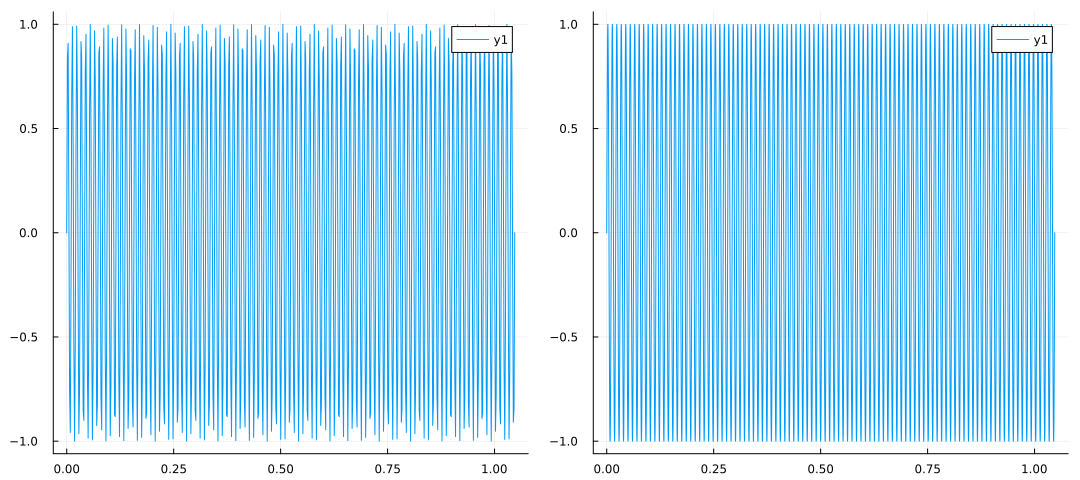

In [65]:
using Plots
p1 = plot(x1,f1);p2=plot(x2,f2)
plot(p1,p2,size=(1080,480))

In [72]:
I1 = [integralsi(x1,f1) integraltr(x1,f1) integralpm(x1,f1)]
I2 = [integralsi(x2,f2) integraltr(x2,f2) integralpm(x2,f2)]
display(I1)
display(I2)

1×3 Matrix{Float64}:
 -3.47656e-14  -3.73959e-14  -3.31939e-14

1×3 Matrix{Float64}:
 -9.06102e-16  -1.67416e-16  6.47587e-16

# Ejercicios Complementarios

## Problema C.1
Idem problema 4, para las siguientes integrales: 
1. $\int_{1/2}^1 x^4 dx$
2. $\int_0^{\pi/4} x \sin x dx$

**Teoría:** Para los metodos de punto medio y trapecio el error es $\mathcal{O}(h^2)$ y está acotado por (en término de n):

$$
E_T = \frac{(b-a)^3}{12n^2}M_2 \;\;\;\;\;\;\; E_M = \frac{(b-a)^3}{24n^2}M_2,
$$

donde 
$$
M_2 = \max_{x \in [a,b]}\{|f''(x)|\}
$$

Para el método de Simpson el error es $\mathcal{O}(h^4)$ está acotado por 

$$
E_S = \frac{(b-a)^5}{180n^4}M_4 
$$

donde 
$$
M_4 = \max_{x \in [a,b]}\{|f^{(4)}(x)|\}
$$


## Problema C.2
**Integración numérica en dos dimensiones**
1. Haga un programa que integre funciones en la region $a\le x \le b\,;\;c \le y \le d$ siguiendo el código delineado en la clase teórica, usando el método de cuadratura de Simpson en cada coordenada.
2. Evalue nume
ricamente con no menos de 8 cifras significativas las integrales
$$
\int_0^2\,dx\, \int_0^1\,dy\, e^{-x\,y} \;\;\;\;\;\;\;\;\;\;\;\;\;\;
\int_{7/5}^2\,dx\, \int_1^{3/2}\,dy\, \ln{(x+2 y)}
$$
3. Modifique el programa para permitir que los límites de integración en $y$ sean función de $x$ y evalue la integral
$$
\int_0^1\,dx\, \int_0^{\sqrt{1-x^2}}\,dy\, e^{-x\,y} 
$$